In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading CSV file
df = pd.read_csv("/content/AIML_Hackathon.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            100000 non-null  int64  
 1   Gender                         100000 non-null  object 
 2   Geographic Location            100000 non-null  object 
 3   Chronic Conditions             100000 non-null  int64  
 4   Past Medical Procedures        100000 non-null  int64  
 5   Comorbidities                  100000 non-null  int64  
 6   Frequency of Visits            100000 non-null  int64  
 7   Appointment Adherence          100000 non-null  float64
 8   Follow-Up Compliance           100000 non-null  float64
 9   Preventive Care                100000 non-null  int64  
 10  Patient Portal Usage           100000 non-null  int64  
 11  Communication Frequency        100000 non-null  int64  
 12  Feedback and Surveys           

In [4]:
df

,Age,Gender,Geographic Location,Chronic Conditions,Past Medical Procedures,Comorbidities,Frequency of Visits,Appointment Adherence,Follow-Up Compliance,Preventive Care,...,Mental Health,Stress Levels,Wait Times,Facility Ratings,Staff Interactions,Accessibility,Referral Source,Family History,Loyalty Program Participation,Loyalty
0,69,Female,Suburban,1,5,2,11,0.59,0.91,1,...,Poor,3,51.737473,3.1,1.4,2.5,Advertisement,Yes,0,3
1,32,Female,Suburban,3,0,2,16,0.59,0.99,1,...,Poor,7,32.281080,4.0,1.2,1.8,Advertisement,No,0,1
2,89,Female,Rural,1,4,0,4,0.73,0.96,1,...,Poor,8,10.571209,1.7,1.4,3.4,Walk-in,No,1,3
3,78,Female,Rural,4,0,0,3,0.72,0.67,0,...,Good,9,15.996252,2.8,4.5,4.5,Referral,Yes,0,3
4,38,Female,Rural,0,2,1,8,0.94,0.93,0,...,Moderate,6,12.904249,4.2,3.6,4.3,Referral,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,51,Female,Suburban,1,9,3,5,0.64,0.72,1,...,Good,6,45.865048,1.8,1.8,4.1,Referral,Yes,1,2
99996,59,Female,Suburban,3,4,0,19,0.92,0.64,0,...,Moderate,8,4.671435,2.3,3.6,3.1,Advertisement,No,1,2
99997,60,Male,Rural,3,5,2,4,0.97,0.78,1,...,Good,1,3.638816,1.7,2.1,1.1,Referral,No,0,2
99998,70,Male,Urban,1,2,1,4,0.56,0.62,1,...,Poor,2,4.634493,4.3,4.1,1.4,Online Search,No,0,3


In [5]:
df=df.fillna("0")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            100000 non-null  int64  
 1   Gender                         100000 non-null  object 
 2   Geographic Location            100000 non-null  object 
 3   Chronic Conditions             100000 non-null  int64  
 4   Past Medical Procedures        100000 non-null  int64  
 5   Comorbidities                  100000 non-null  int64  
 6   Frequency of Visits            100000 non-null  int64  
 7   Appointment Adherence          100000 non-null  float64
 8   Follow-Up Compliance           100000 non-null  float64
 9   Preventive Care                100000 non-null  int64  
 10  Patient Portal Usage           100000 non-null  int64  
 11  Communication Frequency        100000 non-null  int64  
 12  Feedback and Surveys           

In [7]:
#Label Encoding
cat_cols = df.describe(include = 'O').columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

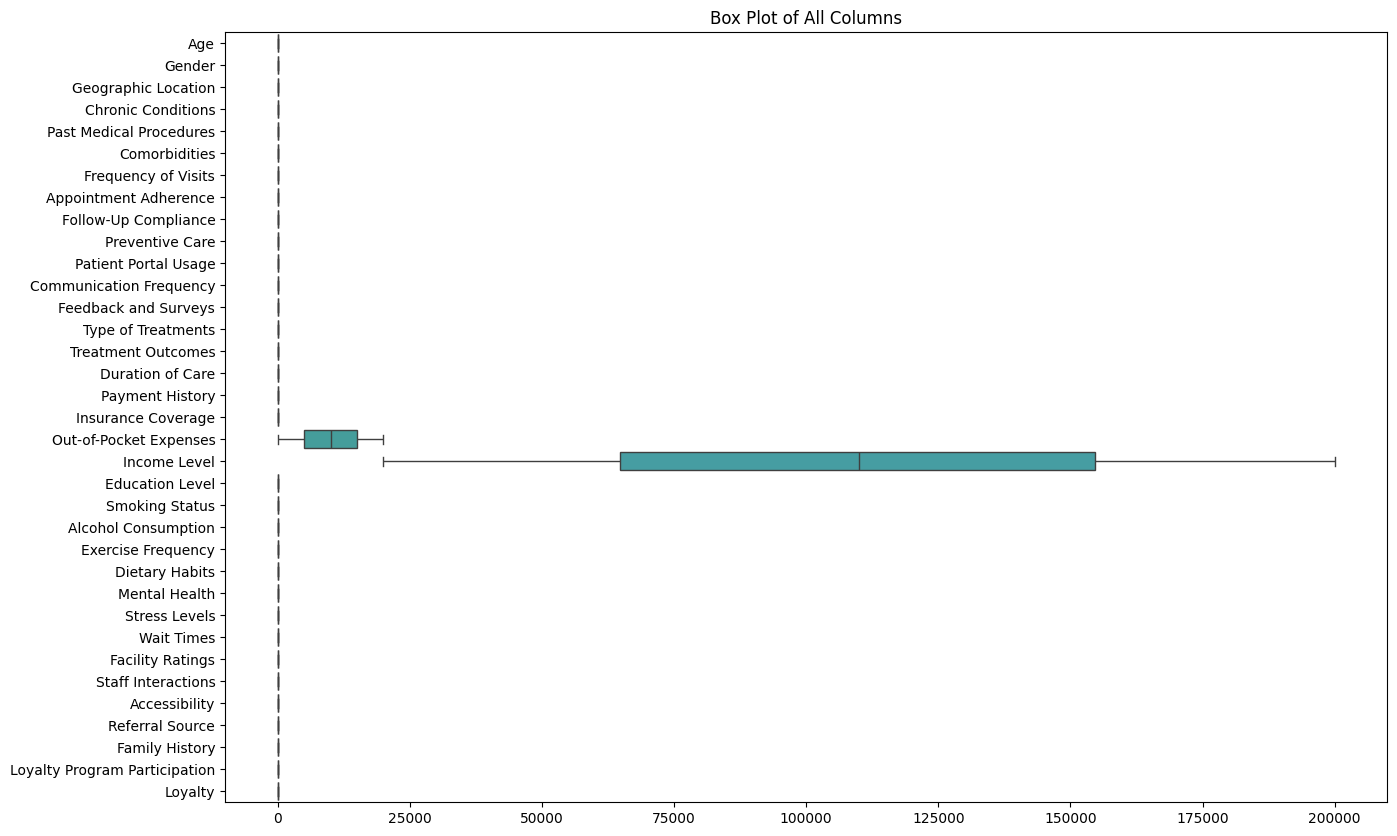

In [8]:
# Outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of All Columns')
plt.show()

In [9]:
#Feature Engineering
df=df.drop("Loyalty Program Participation", axis=1)

In [10]:
columns = df.columns
columns =  [col for col in columns if col not in ['Loyalty']]
features = columns
target = 'Loyalty'

X = df[columns]
y = df[target]

In [11]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [12]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
#Accuracy
from sklearn.metrics import accuracy_score
y_pred_val =model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.9819

In [14]:
# F1 score
from sklearn.metrics import f1_score
mean_f1_score = f1_score(y_val, y_pred_val, average='macro')
mean_f1_score

0.981064837397656

In [15]:
# LGBMClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1427
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 33
[LightGBM] [Info] Start training from score -1.199441
[LightGBM] [Info] Start training from score -1.231858
[LightGBM] [Info] Start training from score -0.899219


LGBMClassifier()

In [16]:
from sklearn.metrics import accuracy_score
y_pred_val =model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.98425

In [17]:
from sklearn.metrics import f1_score
mean_f1_score = f1_score(y_val, y_pred_val, average='macro')
mean_f1_score

0.9833543897232988

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_val)

array([[5931,  135,    7],
       [  47, 5768,   19],
       [  13,   94, 7986]])

In [19]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import accuracy_score
y_pred_val =model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.981

In [21]:
from sklearn.metrics import f1_score
mean_f1_score = f1_score(y_val, y_pred_val, average='macro')
mean_f1_score

0.979732254137876

In [22]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score
y_pred_val =model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.6844

In [24]:
from sklearn.metrics import f1_score
mean_f1_score = f1_score(y_val, y_pred_val, average='macro')
mean_f1_score

0.6566014670149802

In [25]:
# LGBMClassifier
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1427
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 33
[LightGBM] [Info] Start training from score -1.199441
[LightGBM] [Info] Start training from score -1.231858
[LightGBM] [Info] Start training from score -0.899219


LGBMClassifier()

Saving the Trained Model

In [26]:
import pickle

In [27]:
filename = "My_Model.sav"
pickle.dump(model, open(filename, 'wb'))

In [28]:
#Loading Model

In [29]:
loaded_model= pickle.load(open("My_Model.sav",'rb'))

In [30]:
test = pd.read_csv("/content/AIML_Hackathon_test_data_final.csv")
#Label Encoding

for col in cat_cols:
    test[col] = label_encoder.fit_transform(test[col])

test['Label'] = model.predict(test)
test





,Age,Gender,Geographic Location,Chronic Conditions,Past Medical Procedures,Comorbidities,Frequency of Visits,Appointment Adherence,Follow-Up Compliance,Preventive Care,...,Dietary Habits,Mental Health,Stress Levels,Wait Times,Facility Ratings,Staff Interactions,Accessibility,Referral Source,Family History,Label
0,59,0,0,1,1,2,6,0.73,0.59,1,...,2,2,5,42.559563,2.6,3.7,2.0,2,1,2
1,77,0,0,3,7,1,6,0.73,0.86,1,...,1,0,6,4.287225,3.4,3.9,4.0,2,1,3
2,32,1,2,3,9,2,17,0.75,0.65,1,...,2,2,3,16.059261,3.2,4.8,2.4,0,1,1
3,79,1,2,2,8,2,19,0.85,0.96,1,...,1,0,8,30.846299,3.2,4.9,4.8,0,0,3
4,79,1,1,3,6,3,10,0.78,0.67,0,...,2,2,2,21.968482,2.4,2.0,4.0,2,1,3
5,64,0,2,1,3,1,1,0.89,0.64,0,...,2,1,8,25.149403,1.2,3.2,2.3,1,1,3
6,79,0,2,2,1,2,9,0.90,0.55,0,...,0,1,3,7.677687,1.4,1.5,2.4,2,1,3
7,68,0,0,3,7,0,12,0.53,0.70,0,...,1,1,2,50.186072,1.0,4.1,2.9,0,1,3
8,72,0,2,1,5,0,10,0.99,0.79,1,...,0,0,1,44.284933,2.0,4.8,3.8,0,1,3
9,81,1,2,2,9,1,16,0.96,0.62,0,...,0,1,7,45.773129,2.8,5.0,4.9,1,0,3


In [31]:
print("Highly Loyal Customers are following. They deserve a loyality Program")
test[test['Label']==1]


Highly Loyal Customers are following. They deserve a loyality Program


,Age,Gender,Geographic Location,Chronic Conditions,Past Medical Procedures,Comorbidities,Frequency of Visits,Appointment Adherence,Follow-Up Compliance,Preventive Care,...,Dietary Habits,Mental Health,Stress Levels,Wait Times,Facility Ratings,Staff Interactions,Accessibility,Referral Source,Family History,Label
2,32,1,2,3,9,2,17,0.75,0.65,1,...,2,2,3,16.059261,3.2,4.8,2.4,0,1,1
10,20,0,1,0,0,0,10,0.72,0.77,0,...,0,1,4,41.823115,1.0,2.0,1.4,0,0,1
12,24,0,2,1,2,1,18,0.73,0.78,0,...,1,1,8,46.916484,2.4,2.4,4.3,0,0,1


In [32]:
print("Less Loyal Customers are following. They need a personlised Marketing plan")
test[test['Label']==2]

Less Loyal Customers are following. They need a personlised Marketing plan


,Age,Gender,Geographic Location,Chronic Conditions,Past Medical Procedures,Comorbidities,Frequency of Visits,Appointment Adherence,Follow-Up Compliance,Preventive Care,...,Dietary Habits,Mental Health,Stress Levels,Wait Times,Facility Ratings,Staff Interactions,Accessibility,Referral Source,Family History,Label
0,59,0,0,1,1,2,6,0.73,0.59,1,...,2,2,5,42.559563,2.6,3.7,2.0,2,1,2


In [33]:
print("Not Loyal Customers are following. We need to take their feedback to improve better in Future")
test[test['Label']==3]

Not Loyal Customers are following. We need to take their feedback to improve better in Future


,Age,Gender,Geographic Location,Chronic Conditions,Past Medical Procedures,Comorbidities,Frequency of Visits,Appointment Adherence,Follow-Up Compliance,Preventive Care,...,Dietary Habits,Mental Health,Stress Levels,Wait Times,Facility Ratings,Staff Interactions,Accessibility,Referral Source,Family History,Label
1,77,0,0,3,7,1,6,0.73,0.86,1,...,1,0,6,4.287225,3.4,3.9,4.0,2,1,3
3,79,1,2,2,8,2,19,0.85,0.96,1,...,1,0,8,30.846299,3.2,4.9,4.8,0,0,3
4,79,1,1,3,6,3,10,0.78,0.67,0,...,2,2,2,21.968482,2.4,2.0,4.0,2,1,3
5,64,0,2,1,3,1,1,0.89,0.64,0,...,2,1,8,25.149403,1.2,3.2,2.3,1,1,3
6,79,0,2,2,1,2,9,0.90,0.55,0,...,0,1,3,7.677687,1.4,1.5,2.4,2,1,3
7,68,0,0,3,7,0,12,0.53,0.70,0,...,1,1,2,50.186072,1.0,4.1,2.9,0,1,3
8,72,0,2,1,5,0,10,0.99,0.79,1,...,0,0,1,44.284933,2.0,4.8,3.8,0,1,3
9,81,1,2,2,9,1,16,0.96,0.62,0,...,0,1,7,45.773129,2.8,5.0,4.9,1,0,3
11,68,1,2,0,9,0,7,0.95,0.67,0,...,2,2,4,5.093450,4.5,4.5,1.5,3,0,3
